In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [16]:
df['flower_name']=df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [20]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [21]:
import matplotlib.pyplot as plt

Sepal leanght vs sepal width (setosa vs versicolor)

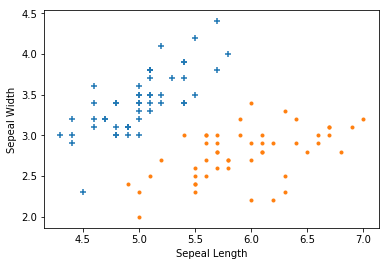

In [26]:
plt.xlabel('Sepeal Length')
plt.ylabel('Sepeal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='.')
plt.show()

Petal lenght vs petal width (setosa vs versicolor)

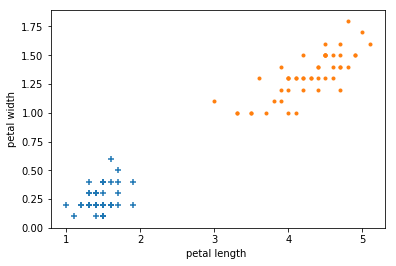

In [27]:
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='.')
plt.show()

Training Using Support vector machine(svm)

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
x= df.drop(['target','flower_name'],axis='columns')
y=df.target

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [34]:
len(x_test)

30

In [35]:
from sklearn.svm import SVC
model=SVC()

In [36]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
model.score(x_test,y_test)

0.9666666666666667

In [46]:
model.predict([[2.8,0.2,0.5,0.3]])

array([2])

Tune parameters

1. Regularization(c)

In [49]:
model_c =SVC(C=10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.9333333333333333

2. Gamma

In [51]:
model_g = SVC(gamma=10)
model_g.fit(x_train,y_train)
model_g.score(x_test, y_test)

0.9333333333333333

3. Kernal

In [53]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
model_linear_kernal.score(x_test,y_test)

1.0